# About

Here we prepare the results to be used in plots and tables by combining them, extracting a metric of interest and saving them into csv files.

The results were obtained in:
- `colab_extended_grid_search_pipeline.ipynb`
- `colab_extended_GPflow_pipeline.ipynb`


# Setup

## Look around

In [1]:
%ls

all_plots.ipynb
colab_extended_GPflow_pipeline.ipynb
colab_extended_ci_rf_and_gp_one_run.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
prepare_extended_grid_search_results.ipynb
prepare_reproducing_grid_search_results.ipynb


In [2]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

## Import Modules

### Standard imports

In [3]:
import json
import pickle

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap


from util_scripts.plotting_functions_and_vars import datasets_to_rounding_precision

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [5]:
# root = '../backup_results'
root = '../results'

In [6]:
dataset = 'lipophilicity'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

# correlated features treatment
if dataset == 'esol':
    cf = 'reduced'
else:
    cf = 'full'
assert cf in ['reduced', 'full']

In [7]:
# # for esol
# cf = 'full'

## Titles, Units and Labels for datasets

In [8]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [9]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [10]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


In [11]:
rp = datasets_to_rounding_precision[dataset]
rp

3

## CHOOSE metric to display

In [12]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [13]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [14]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

### Sklearn

In [15]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores_{cf}.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores_{cf}.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params_{cf}.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

# with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params_{cf}.pickle', 'rb') as fp:
#     params = pickle.load(fp)

In [16]:
# best_params

Have a look at best parameters.

In [17]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 950, 'rf__max_features': 0.4},
 'xgb': {'xgb__subsample': 1,
  'xgb__n_estimators': 400,
  'xgb__max_depth': 9,
  'xgb__learning_rate': 0.1},
 'krr': {'krr__alpha': 0.01},
 'gp': {'gp__kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [18]:
# val_scores

In [19]:
# train_test_scores

### GPflow

In [20]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_val_scores.pickle', 'rb') as fp:
    gpflow_val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_train_test_scores.pickle', 'rb') as fp:
    gpflow_train_test_scores = pickle.load(fp)

In [21]:
# gpflow_val_scores

### Get means and standard deviations

#### Scikit-Learn

Get the means over folds (`cross_validate()` records the results as arrays even for `num_folds=1`)

In [22]:
scores = val_scores
mean_val_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_val_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_val_scores
# std_val_scores

In [23]:
scores = train_test_scores
mean_train_test_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_train_test_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_train_test_scores
# std_train_test_scores

#### GPflow

In [24]:
scores = gpflow_val_scores
gpflow_mean_val_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_val_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_val_scores
# gpflow_std_val_scores

In [25]:
scores = gpflow_train_test_scores
gpflow_mean_train_test_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_train_test_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_train_test_scores
# gpflow_std_train_test_scores

# Visualization

## Plotting options

In [26]:
mean_val_scores.keys()

dict_keys(['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6', '1024ecfp-4 + RDKit', '1024ecfp-6 + RDKit', '2048ecfp-4 + RDKit', '2048ecfp-6 + RDKit'])

In [27]:
column_order = ['RDKit',
                '1024ecfp-4', '1024ecfp-4 + RDKit',
                '1024ecfp-6', '1024ecfp-6 + RDKit',
                '2048ecfp-4', '2048ecfp-4 + RDKit',
                '2048ecfp-6', '2048ecfp-6 + RDKit'
                ]

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'GP-sklearn', 'GP-GPflow']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'GP-sklearn',
    'gpflow': 'GP-GPflow'
}

## Train metric

In [28]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.26,0.31,0.32,0.30,0.31,0.25,0.25,0.25,0.25
xgb,0.31,0.11,0.05,0.17,0.10,0.33,0.31,0.10,0.06
krr,0.28,0.04,0.03,0.04,0.02,0.03,0.02,0.03,0.02
gp,0.12,0.33,0.69,0.16,0.30,0.12,0.49,0.14,0.33


In [29]:
gpflow_train_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'train_{metric}']} for features in gpflow_mean_train_test_scores}
for features in train_metric:
    if features not in gpflow_train_metric:
        gpflow_train_metric[features] = {}
        gpflow_train_metric[features]['gpflow'] = None
gpflow_train_metric = pd.DataFrame(gpflow_train_metric)[train_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_train_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,0.06,0.04,0.06,0.04,None,None,None,None


In [30]:
combined_train_metric = pd.concat([train_metric, gpflow_train_metric])
combined_train_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.26,0.31,0.32,0.30,0.31,0.25,0.25,0.25,0.25
xgb,0.31,0.11,0.05,0.17,0.10,0.33,0.31,0.10,0.06
krr,0.28,0.04,0.03,0.04,0.02,0.03,0.02,0.03,0.02
gp,0.12,0.33,0.69,0.16,0.30,0.12,0.49,0.14,0.33
gpflow,NaN,0.06,0.04,0.06,0.04,NaN,NaN,NaN,NaN


In [31]:
df = combined_train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]
df

,RDKit,1024ecfp-4,1024ecfp-4 + RDKit,1024ecfp-6,1024ecfp-6 + RDKit,2048ecfp-4,2048ecfp-4 + RDKit,2048ecfp-6,2048ecfp-6 + RDKit
Random Forest,0.26,0.31,0.25,0.32,0.25,0.30,0.25,0.31,0.25
XGBoost,0.31,0.11,0.33,0.05,0.31,0.17,0.10,0.10,0.06
Kernel Ridge,0.28,0.04,0.03,0.03,0.02,0.04,0.03,0.02,0.02
GP-sklearn,0.12,0.33,0.12,0.69,0.49,0.16,0.14,0.30,0.33
GP-GPflow,NaN,0.06,NaN,0.04,NaN,0.06,NaN,0.04,NaN


### Heatmap (train)

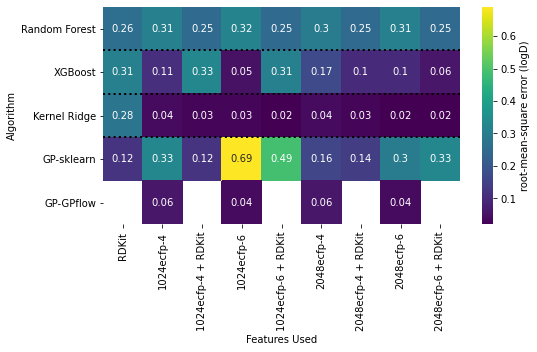

In [32]:
plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

### Scikit-Learn

In [33]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.66,0.81,0.84,0.78,0.81,0.65,0.65,0.65,0.65
xgb,0.63,0.79,0.82,0.76,0.79,0.62,0.63,0.62,0.62
krr,0.64,0.84,0.83,0.91,0.85,0.68,0.66,0.81,0.71
gp,0.59,1.05,1.02,0.82,1.16,0.63,37917.90,0.67,29774.31


### GPflow

In [34]:
gpflow_val_metric = {features: {'gpflow': gpflow_mean_val_scores[features][f'test_{metric}']} for features in gpflow_mean_val_scores}
for features in val_metric:
    if features not in gpflow_val_metric:
        gpflow_val_metric[features] = {}
        gpflow_val_metric[features]['gpflow'] = None
gpflow_val_metric = pd.DataFrame(gpflow_val_metric)[val_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_val_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,0.74,0.78,0.7,0.74,None,None,None,None


### Combined (val)

In [35]:
combined_val_metric = pd.concat([val_metric, gpflow_val_metric])
combined_val_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.66,0.81,0.84,0.78,0.81,0.65,0.65,0.65,0.65
xgb,0.63,0.79,0.82,0.76,0.79,0.62,0.63,0.62,0.62
krr,0.64,0.84,0.83,0.91,0.85,0.68,0.66,0.81,0.71
gp,0.59,1.05,1.02,0.82,1.16,0.63,37917.90,0.67,29774.31
gpflow,NaN,0.74,0.78,0.70,0.74,NaN,NaN,NaN,NaN


In [36]:
df = combined_val_metric
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]
df

,RDKit,1024ecfp-4,1024ecfp-4 + RDKit,1024ecfp-6,1024ecfp-6 + RDKit,2048ecfp-4,2048ecfp-4 + RDKit,2048ecfp-6,2048ecfp-6 + RDKit
Random Forest,0.663037,0.809012,0.648765,0.843417,0.654838,0.775045,0.649224,0.813262,0.651554
XGBoost,0.630900,0.786780,0.617527,0.819866,0.626844,0.761844,0.615225,0.789871,0.619120
Kernel Ridge,0.641093,0.841189,0.679430,0.831321,0.661572,0.913659,0.807309,0.851520,0.708265
GP-sklearn,0.593916,1.049610,0.634698,1.016808,37917.903493,0.821471,0.666196,1.159482,29774.311291
GP-GPflow,NaN,0.737232,NaN,0.780519,NaN,0.699894,NaN,0.743065,NaN


In [37]:
df.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_combined_val_{metric}_model_x_featureset_heatmap_df.csv', index=True)

### Heatmap (val)

In [38]:
df = pd.read_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_combined_val_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)
df

,RDKit,1024ecfp-4,1024ecfp-4 + RDKit,1024ecfp-6,1024ecfp-6 + RDKit,2048ecfp-4,2048ecfp-4 + RDKit,2048ecfp-6,2048ecfp-6 + RDKit
Random Forest,0.663037,0.809012,0.648765,0.843417,0.654838,0.775045,0.649224,0.813262,0.651554
XGBoost,0.630900,0.786780,0.617527,0.819866,0.626844,0.761844,0.615225,0.789871,0.619120
Kernel Ridge,0.641093,0.841189,0.679430,0.831321,0.661572,0.913659,0.807309,0.851520,0.708265
GP-sklearn,0.593916,1.049610,0.634698,1.016808,37917.903493,0.821471,0.666196,1.159482,29774.311291
GP-GPflow,NaN,0.737232,NaN,0.780519,NaN,0.699894,NaN,0.743065,NaN


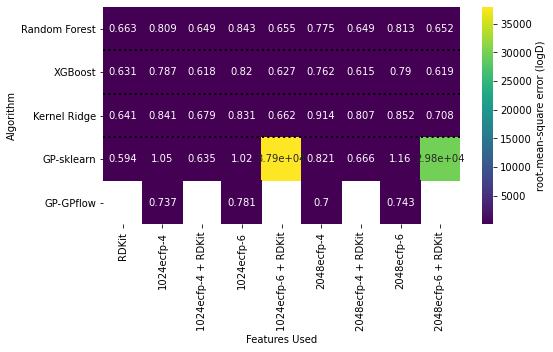

In [39]:
plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [40]:
combined_val_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.663037,0.809012,0.843417,0.775045,0.813262,0.648765,0.654838,0.649224,0.651554
xgb,0.630900,0.786780,0.819866,0.761844,0.789871,0.617527,0.626844,0.615225,0.619120
krr,0.641093,0.841189,0.831321,0.913659,0.851520,0.679430,0.661572,0.807309,0.708265
gp,0.593916,1.049610,1.016808,0.821471,1.159482,0.634698,37917.903493,0.666196,29774.311291
gpflow,NaN,0.737232,0.780519,0.699894,0.743065,NaN,NaN,NaN,NaN


### Scikit-Learn best

In [41]:
best = []
for model in val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(val_metric.loc[model, val_metric.loc[model] == val_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
    print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    print()

gp RDKit 0.5939161242167411 0.01580686109038748

xgb 2048ecfp-4 + RDKit 0.6152249771731683 0.015064204169378212

krr RDKit 0.6410925922281541 0.04143661064525223

rf 1024ecfp-4 + RDKit 0.6487654748816032 0.0204837621579914



In [42]:
pd.DataFrame(best)

,0,1,2,3
0,gp,RDKit,0.593916,0.015807
1,xgb,2048ecfp-4 + RDKit,0.615225,0.015064
2,krr,RDKit,0.641093,0.041437
3,rf,1024ecfp-4 + RDKit,0.648765,0.020484


In [43]:
dataset

'lipophilicity'

### Combined (val)

In [44]:
best = []
for model in combined_val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_val_metric.loc[model, combined_val_metric.loc[model] == combined_val_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
        print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}'])
    print()

gp RDKit 0.5939161242167411 0.01580686109038748

xgb 2048ecfp-4 + RDKit 0.6152249771731683 0.015064204169378212

krr RDKit 0.6410925922281541 0.04143661064525223

rf 1024ecfp-4 + RDKit 0.6487654748816032 0.0204837621579914

gpflow 2048ecfp-4 0.6998935764408948 0.012586121986796634



In [45]:
dataset, smile_type, grid_search_type, cf

('lipophilicity', 'original', 'extended', 'full')

In [46]:
best_val_scores = pd.DataFrame(best)
best_val_scores

,0,1,2,3
0,gp,RDKit,0.593916,0.015807
1,xgb,2048ecfp-4 + RDKit,0.615225,0.015064
2,krr,RDKit,0.641093,0.041437
3,rf,1024ecfp-4 + RDKit,0.648765,0.020484
4,gpflow,2048ecfp-4,0.699894,0.012586


In [47]:
best_val_scores.columns = ['Model', 'Feature set', 'mean', 'std']
best_val_scores = best_val_scores.round(rp)
best_val_scores

,Model,Feature set,mean,std
0,gp,RDKit,0.594,0.016
1,xgb,2048ecfp-4 + RDKit,0.615,0.015
2,krr,RDKit,0.641,0.041
3,rf,1024ecfp-4 + RDKit,0.649,0.020
4,gpflow,2048ecfp-4,0.700,0.013


In [48]:
best_val_scores.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_best_val_{metric}_model_x_featureset_mean_std.csv', index=True)

## Test metric

### Scikit-Learn

In [49]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.69,0.83,0.85,0.80,0.83,0.67,0.68,0.68,0.68
xgb,0.66,0.80,0.82,0.77,0.81,0.64,0.66,0.64,0.64
krr,0.67,0.82,0.82,0.90,0.83,0.68,0.68,0.79,0.73
gp,0.63,0.80,0.98,0.80,1.15,0.64,0.78,0.66,0.95


### GPflow

In [50]:
gpflow_test_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'test_{metric}']} for features in gpflow_mean_train_test_scores}
for features in test_metric:
    if features not in gpflow_test_metric:
        gpflow_test_metric[features] = {}
        gpflow_test_metric[features]['gpflow'] = None
gpflow_test_metric = pd.DataFrame(gpflow_test_metric)[test_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_test_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,0.72,0.76,0.69,0.73,None,None,None,None


### Combined (test)

In [51]:
combined_test_metric = pd.concat([test_metric, gpflow_test_metric])
combined_test_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.69,0.83,0.85,0.80,0.83,0.67,0.68,0.68,0.68
xgb,0.66,0.80,0.82,0.77,0.81,0.64,0.66,0.64,0.64
krr,0.67,0.82,0.82,0.90,0.83,0.68,0.68,0.79,0.73
gp,0.63,0.80,0.98,0.80,1.15,0.64,0.78,0.66,0.95
gpflow,NaN,0.72,0.76,0.69,0.73,NaN,NaN,NaN,NaN


In [52]:
df = combined_test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]
df

,RDKit,1024ecfp-4,1024ecfp-4 + RDKit,1024ecfp-6,1024ecfp-6 + RDKit,2048ecfp-4,2048ecfp-4 + RDKit,2048ecfp-6,2048ecfp-6 + RDKit
Random Forest,0.69,0.83,0.67,0.85,0.68,0.80,0.68,0.83,0.68
XGBoost,0.66,0.80,0.64,0.82,0.66,0.77,0.64,0.81,0.64
Kernel Ridge,0.67,0.82,0.68,0.82,0.68,0.90,0.79,0.83,0.73
GP-sklearn,0.63,0.80,0.64,0.98,0.78,0.80,0.66,1.15,0.95
GP-GPflow,NaN,0.72,NaN,0.76,NaN,0.69,NaN,0.73,NaN


In [53]:
df.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_combined_test_{metric}_model_x_featureset_heatmap_df.csv', index=True)

### Heatmap (test)

In [54]:
df = pd.read_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_combined_test_{metric}_model_x_featureset_heatmap_df.csv', index_col=0)
df

,RDKit,1024ecfp-4,1024ecfp-4 + RDKit,1024ecfp-6,1024ecfp-6 + RDKit,2048ecfp-4,2048ecfp-4 + RDKit,2048ecfp-6,2048ecfp-6 + RDKit
Random Forest,0.69,0.83,0.67,0.85,0.68,0.80,0.68,0.83,0.68
XGBoost,0.66,0.80,0.64,0.82,0.66,0.77,0.64,0.81,0.64
Kernel Ridge,0.67,0.82,0.68,0.82,0.68,0.90,0.79,0.83,0.73
GP-sklearn,0.63,0.80,0.64,0.98,0.78,0.80,0.66,1.15,0.95
GP-GPflow,NaN,0.72,NaN,0.76,NaN,0.69,NaN,0.73,NaN


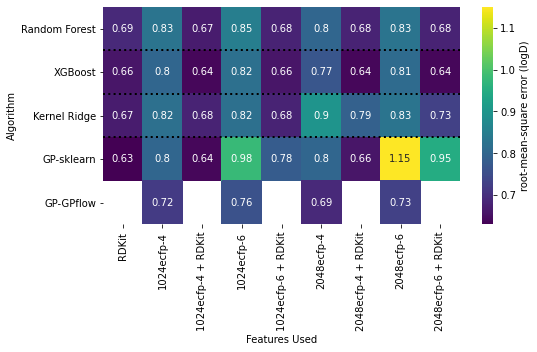

In [55]:
plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [56]:
combined_test_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.690765,0.829097,0.845208,0.801353,0.825029,0.670997,0.678017,0.678806,0.675074
xgb,0.660805,0.801091,0.817932,0.769080,0.809381,0.636322,0.655600,0.640713,0.643897
krr,0.665612,0.822457,0.818048,0.896998,0.826634,0.679417,0.676069,0.794012,0.727349
gp,0.632699,0.801513,0.983819,0.799493,1.153606,0.638386,0.777124,0.659990,0.951188
gpflow,NaN,0.724286,0.757914,0.687052,0.727057,NaN,NaN,NaN,NaN


## Best feature set for each model

### Scikit-Learn

In [57]:
best = []
for model in test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(test_metric.loc[model, test_metric.loc[model] == test_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
    print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    print()

gp RDKit 0.6326990330037838 0.026320484823695308

xgb 1024ecfp-4 + RDKit 0.6363220904305424 0.020775125556533783

krr RDKit 0.6656120334939409 0.05216840717769401

rf 1024ecfp-4 + RDKit 0.67099674337315 0.02163595754125149



In [58]:
pd.DataFrame(best)

,0,1,2,3
0,gp,RDKit,0.632699,0.026320
1,xgb,1024ecfp-4 + RDKit,0.636322,0.020775
2,krr,RDKit,0.665612,0.052168
3,rf,1024ecfp-4 + RDKit,0.670997,0.021636


### Combined best

In [59]:
best = []
for model in combined_test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_test_metric.loc[model, combined_test_metric.loc[model] == combined_test_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
        print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}'])
    print()

gp RDKit 0.6326990330037838 0.026320484823695308

xgb 1024ecfp-4 + RDKit 0.6363220904305424 0.020775125556533783

krr RDKit 0.6656120334939409 0.05216840717769401

rf 1024ecfp-4 + RDKit 0.67099674337315 0.02163595754125149

gpflow 2048ecfp-4 0.6870524728614278 0.0652835525038975



In [60]:
dataset, smile_type, grid_search_type, cf

('lipophilicity', 'original', 'extended', 'full')

In [61]:
best_test_scores = pd.DataFrame(best)
best_test_scores

,0,1,2,3
0,gp,RDKit,0.632699,0.026320
1,xgb,1024ecfp-4 + RDKit,0.636322,0.020775
2,krr,RDKit,0.665612,0.052168
3,rf,1024ecfp-4 + RDKit,0.670997,0.021636
4,gpflow,2048ecfp-4,0.687052,0.065284


In [62]:
best_test_scores.columns = ['Model', 'Feature set', 'mean', 'std']
best_val_scores = best_test_scores.round(rp)
best_val_scores

,Model,Feature set,mean,std
0,gp,RDKit,0.633,0.026
1,xgb,1024ecfp-4 + RDKit,0.636,0.021
2,krr,RDKit,0.666,0.052
3,rf,1024ecfp-4 + RDKit,0.671,0.022
4,gpflow,2048ecfp-4,0.687,0.065


In [63]:
best_test_scores.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_{cf}_best_test_{metric}_model_x_featureset_mean_std.csv', index=False)